In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
eco_df = pd.read_excel('../data/TEIS-NSS Project Data 10-2022.xlsx',sheet_name =('ECO with Exit21-22'))
elig_df = pd.read_excel('../data/TEIS-NSS Project Data 10-2022.xlsx',sheet_name =('Elig Timeline Rpt 2018-2022'))

In [3]:
eco_df.head()

,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Days btw I-IFSP to entry ECO
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,206.0,183.0,0.0
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,704.0,514.0,0.0
2,ET,510663.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,115.0,-44483.0,-44483.0
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1053.0,1026.0,0.0
4,ET,506507.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,159.0,-44434.0,-44434.0


In [4]:
new_eco_df = eco_df[['DISTRICT','CHILD_ID','<Calc> Months in Program','Ent SOCIAL_SCALE','Ent KNOWLEDGE_SCALE','Ent APPROPRIATE_ACTION_SCALE','Exit SOCIAL_SCALE','Exit KNOWLEDGE_SCALE','Exit APPROPRIATE_ACTION_SCALE','OC1 Data Check']]

In [5]:
new_eco_df.columns = ['district', 'child_id', 'month_count', 'ent_social','ent_knowledge','ent_app_action','ext_social','exit_knowledge','exit_app_action','oc1_data_check']

In [6]:
new_elig_df = elig_df[['District','Child ID','Init. Elig. Category']]

In [7]:
new_elig_df.columns = ['district','child_id','elig_cat']

In [8]:
eco_nnull_df = new_eco_df.dropna(how='any', axis=0)

In [9]:
elig_nnull_df = new_elig_df.dropna(how='any', axis=0)

In [10]:
combined_eco_elig_df = eco_nnull_df.merge(elig_nnull_df, on=['district', 'child_id'], how='outer')

In [11]:
combined_eco_elig_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38294 entries, 0 to 38293
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   district         38294 non-null  object 
 1   child_id         38294 non-null  float64
 2   month_count      5721 non-null   float64
 3   ent_social       5721 non-null   float64
 4   ent_knowledge    5721 non-null   float64
 5   ent_app_action   5721 non-null   float64
 6   ext_social       5721 non-null   float64
 7   exit_knowledge   5721 non-null   float64
 8   exit_app_action  5721 non-null   float64
 9   oc1_data_check   5721 non-null   float64
 10  elig_cat         38290 non-null  object 
dtypes: float64(9), object(2)
memory usage: 3.5+ MB


In [12]:
combined_eco_elig_nnull_df = combined_eco_elig_df.dropna(how='any', axis=0)

In [13]:
combined_eco_elig_nnull_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5717 entries, 0 to 5720
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   district         5717 non-null   object 
 1   child_id         5717 non-null   float64
 2   month_count      5717 non-null   float64
 3   ent_social       5717 non-null   float64
 4   ent_knowledge    5717 non-null   float64
 5   ent_app_action   5717 non-null   float64
 6   ext_social       5717 non-null   float64
 7   exit_knowledge   5717 non-null   float64
 8   exit_app_action  5717 non-null   float64
 9   oc1_data_check   5717 non-null   float64
 10  elig_cat         5717 non-null   object 
dtypes: float64(9), object(2)
memory usage: 536.0+ KB


In [14]:
combined_eco_elig_nnull_df['social_change'] = combined_eco_elig_nnull_df['ext_social'] - combined_eco_elig_nnull_df['ent_social']
combined_eco_elig_nnull_df['knowledge_change'] = combined_eco_elig_nnull_df['exit_knowledge'] - combined_eco_elig_nnull_df['ent_knowledge']
combined_eco_elig_nnull_df['app_action_change'] = combined_eco_elig_nnull_df['exit_app_action'] - combined_eco_elig_nnull_df['ent_app_action']

C:\Users\aaust\AppData\Local\Temp\ipykernel_14472\1023725895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_eco_elig_nnull_df['social_change'] = combined_eco_elig_nnull_df['ext_social'] - combined_eco_elig_nnull_df['ent_social']
C:\Users\aaust\AppData\Local\Temp\ipykernel_14472\1023725895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_eco_elig_nnull_df['knowledge_change'] = combined_eco_elig_nnull_df['exit_knowledge'] - combined_eco_elig_nnull_df['ent_knowledge']
C:\Users\aaust\A

In [15]:
comb_ee = combined_eco_elig_nnull_df

In [16]:
dev_eval = comb_ee[['district','month_count','elig_cat','social_change', 'knowledge_change','app_action_change']]

In [17]:
dev_eval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5717 entries, 0 to 5720
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   district           5717 non-null   object 
 1   month_count        5717 non-null   float64
 2   elig_cat           5717 non-null   object 
 3   social_change      5717 non-null   float64
 4   knowledge_change   5717 non-null   float64
 5   app_action_change  5717 non-null   float64
dtypes: float64(4), object(2)
memory usage: 312.6+ KB


Text(0.5, 1.0, 'Both')

<Figure size 3600x3600 with 0 Axes>

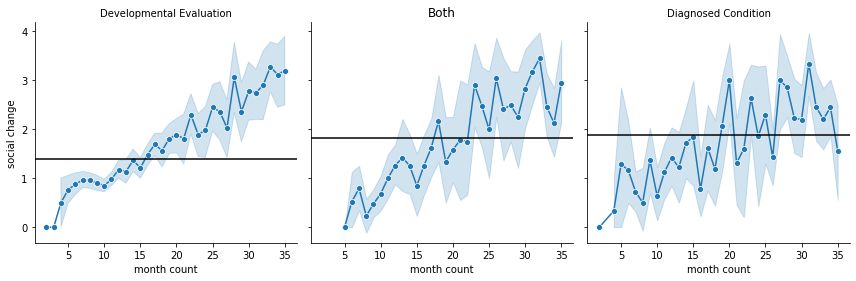

In [30]:
plt.figure(figsize=(50,50))

g = sns.FacetGrid(dev_eval, col = 'elig_cat', height =4)
g.map(sns.lineplot, 'month_count','social_change', marker='o')
g.set_axis_labels('month count', 'social change')

# Average point increase for test scores based on elig cat
g = g.map(lambda y, **kw: plt.axhline(y.mean(), color="k"), 'social_change')

g.set_titles(col_template = "{col_name}")
g.axes[0,0].set_xlabel('month count')
g.axes[0,1].set_xlabel('month count')
g.axes[0,2].set_xlabel('month count')
g.axes[0,1].set_title('Both')

#put your y-ticks (y-axis changes here)



Text(0.5, 1.0, 'Both')

<Figure size 3600x3600 with 0 Axes>

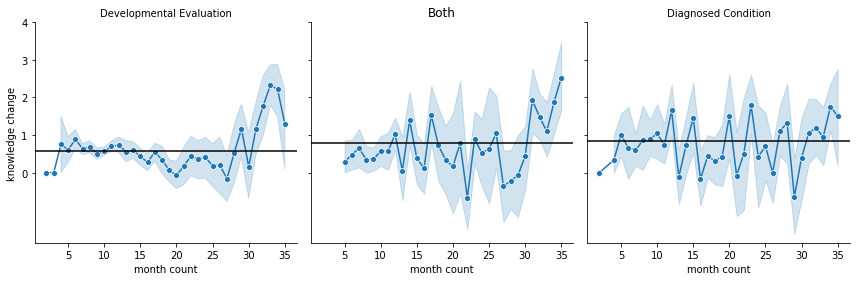

In [50]:
plt.figure(figsize=(50,50))

g = sns.FacetGrid(dev_eval, col = 'elig_cat', height =4)
g.map(sns.lineplot, 'month_count','knowledge_change', marker='o')

g.set(yticks=np.arange(0,5,1))


g.set_axis_labels('month count', 'knowledge change')

# Average point increase for test scores based on elig cat
g = g.map(lambda y, **kw: plt.axhline(y.mean(), color="k"), 'knowledge_change')

g.set_titles(col_template = "{col_name}")
g.axes[0,0].set_xlabel('month count')
g.axes[0,1].set_xlabel('month count')
g.axes[0,2].set_xlabel('month count')
g.axes[0,1].set_title('Both')




Text(0.5, 1.0, 'Both')

<Figure size 3600x3600 with 0 Axes>

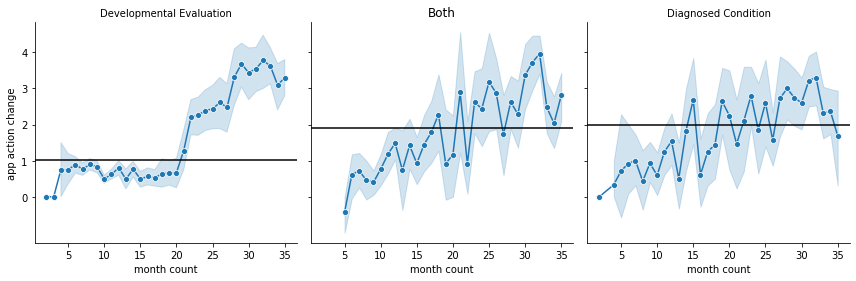

In [51]:
plt.figure(figsize=(50,50))

g = sns.FacetGrid(dev_eval, col = 'elig_cat', height =4)
g.map(sns.lineplot, 'month_count','app_action_change', marker='o')

g.set(yticks=np.arange(0,5,1))


g.set_axis_labels('month count', 'app action change')

# Average point increase for test scores based on elig cat
g = g.map(lambda y, **kw: plt.axhline(y.mean(), color="k"), 'app_action_change')

g.set_titles(col_template = "{col_name}")
g.axes[0,0].set_xlabel('month count')
g.axes[0,1].set_xlabel('month count')
g.axes[0,2].set_xlabel('month count')
g.axes[0,1].set_title('Both')

<Figure size 3600x3600 with 0 Axes>

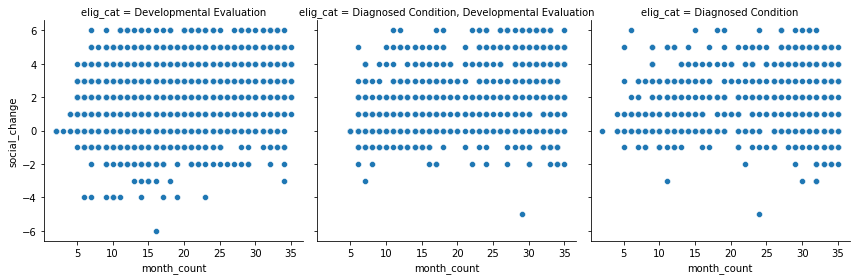

In [23]:
plt.figure(figsize=(50,50))

g = sns.FacetGrid(dev_eval, col = 'elig_cat', height =4)
g.map(sns.scatterplot, 'month_count', 'social_change')
# g.axes[0,0].set_xlabel('month_count')
# g.axes[0,1].set_xlabel('month_count')
# g.axes[0,2].set_xlabel('month_count')

# Average point increase for test scores based on elig cat
# g = g.map(lambda y, **kw: plt.axhline(y.mean(), color="k"), 'social_change')
